# Exloratory data analysis

In [1]:
!pip install ydata_profiling
!pip install sweetviz

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import ydata_profiling as yp
import sweetviz as sv

In [4]:
df=pd.read_csv('data_clean.csv')
df.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(158, 10)

In [7]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

# Data type conversion

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [9]:
df.isna().sum()    #for getting null values in each columns

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

In [10]:
df1=df.iloc[:,1:]   #ignoring 1st column
df1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [11]:
df=df1.copy()

In [12]:
df['Month']=pd.to_numeric(df['Month'], errors='coerce')
df['Temp C']=pd.to_numeric(df['Temp C'], errors='coerce')   #coerce: in data if is finds int value then it converts but when not able to convert pust it as null
df['Weather']=df['Weather'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 10.3 KB


# Duplicates

In [14]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [15]:
#count of duplicated rows
df[df.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [16]:
df[~df.duplicated()]   #'~' sign change stat from true to false and vise versa means we got not duplicated rows

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


In [17]:
df_clean=df.drop_duplicates()     #drps duplicate values

In [18]:
df_clean.shape

(157, 9)

# Drop columns

In [19]:
# del df_clean['Temp C']
df_clean.drop(['Temp C'], axis=1)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [20]:
df_clean2=df_clean.drop(['Temp C'], axis=1)

In [21]:
df_clean2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


# Rename columns

In [22]:
#rename solar column
df_clean3=df_clean2.rename({'Solar.R': 'Solar'}, axis=1)

In [23]:
df_clean3.head(2)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C


# Outlier detection

<Axes: >

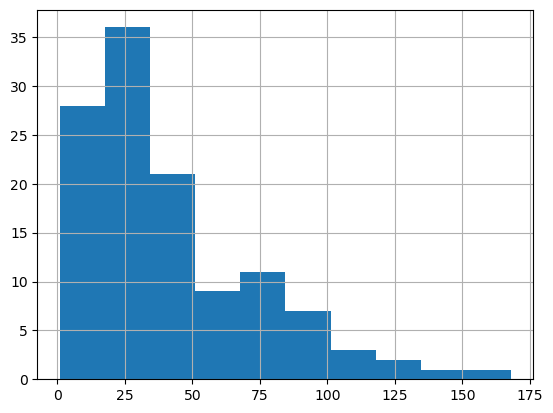

In [24]:
df_clean3['Ozone'].hist()

<Axes: >

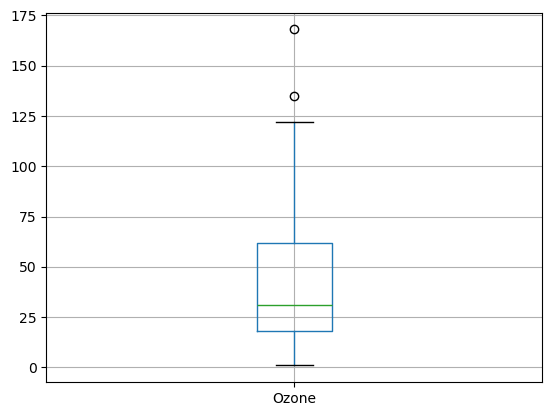

In [25]:
df_clean3.boxplot(column='Ozone')

In [26]:
df_clean3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

<Axes: xlabel='Weather'>

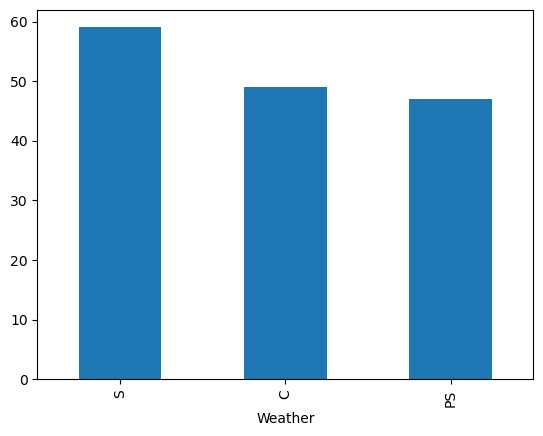

In [27]:
#bar plot
df['Weather'].value_counts().plot.bar()

# Missing value & imputation

<Axes: >

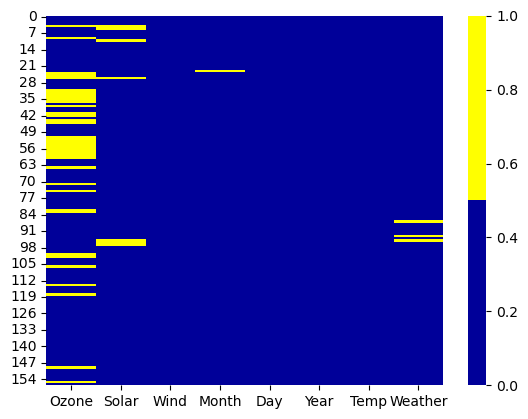

In [28]:
import seaborn as sns
cols=df_clean3.columns
sns.heatmap(df_clean3[cols].isnull(),
           cmap=sns.color_palette(['#000099','#ffff00']))    #in Yellow color values are missing

In [29]:
df_clean3.isnull().any(axis=1) #if at least one value is null it returns true for column.

0      False
1      False
2      False
3      False
4       True
       ...  
152    False
153    False
154    False
155     True
157    False
Length: 157, dtype: bool

In [30]:
df_clean3[df_clean3.isnull().any(axis=1)]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,5.0,5,2010,56,S
5,28.0,NaN,14.9,5.0,6,2010,66,C
9,NaN,194.0,8.6,5.0,10,2010,69,S
10,7.0,NaN,6.9,5.0,11,2010,74,C
23,32.0,92.0,12.0,NaN,24,2010,61,C
24,NaN,66.0,16.6,5.0,25,2010,57,PS
25,NaN,266.0,14.9,5.0,26,2010,58,C
26,NaN,NaN,8.0,5.0,27,2010,57,PS
31,NaN,286.0,8.6,6.0,1,2010,78,S
32,NaN,287.0,9.7,6.0,2,2010,74,C


In [31]:
df_clean3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [32]:
 df_clean3['Month'].value_counts()  #value count for Month column

Month
9.0    33
5.0    31
7.0    31
8.0    31
6.0    30
Name: count, dtype: int64

In [33]:
df_clean3['Weather'].value_counts()

Weather
S     58
C     49
PS    47
Name: count, dtype: int64

In [34]:
df_clean3['Weather']=df_clean3['Weather'].fillna('S')
df_clean3['Month']=df_clean3['Month'].fillna('9.0')

In [35]:
df_clean3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [36]:
#impute other column values by average
for i in df_clean3.columns:
    try:
        mean=df_clean3[i].mean()
        df_clean3[i]=df_clean3[i].fillna(mean)
    except:
        pass

In [37]:
df_clean3.isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

# Scatter plot & correlation analysis

In [38]:
df_clean3.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

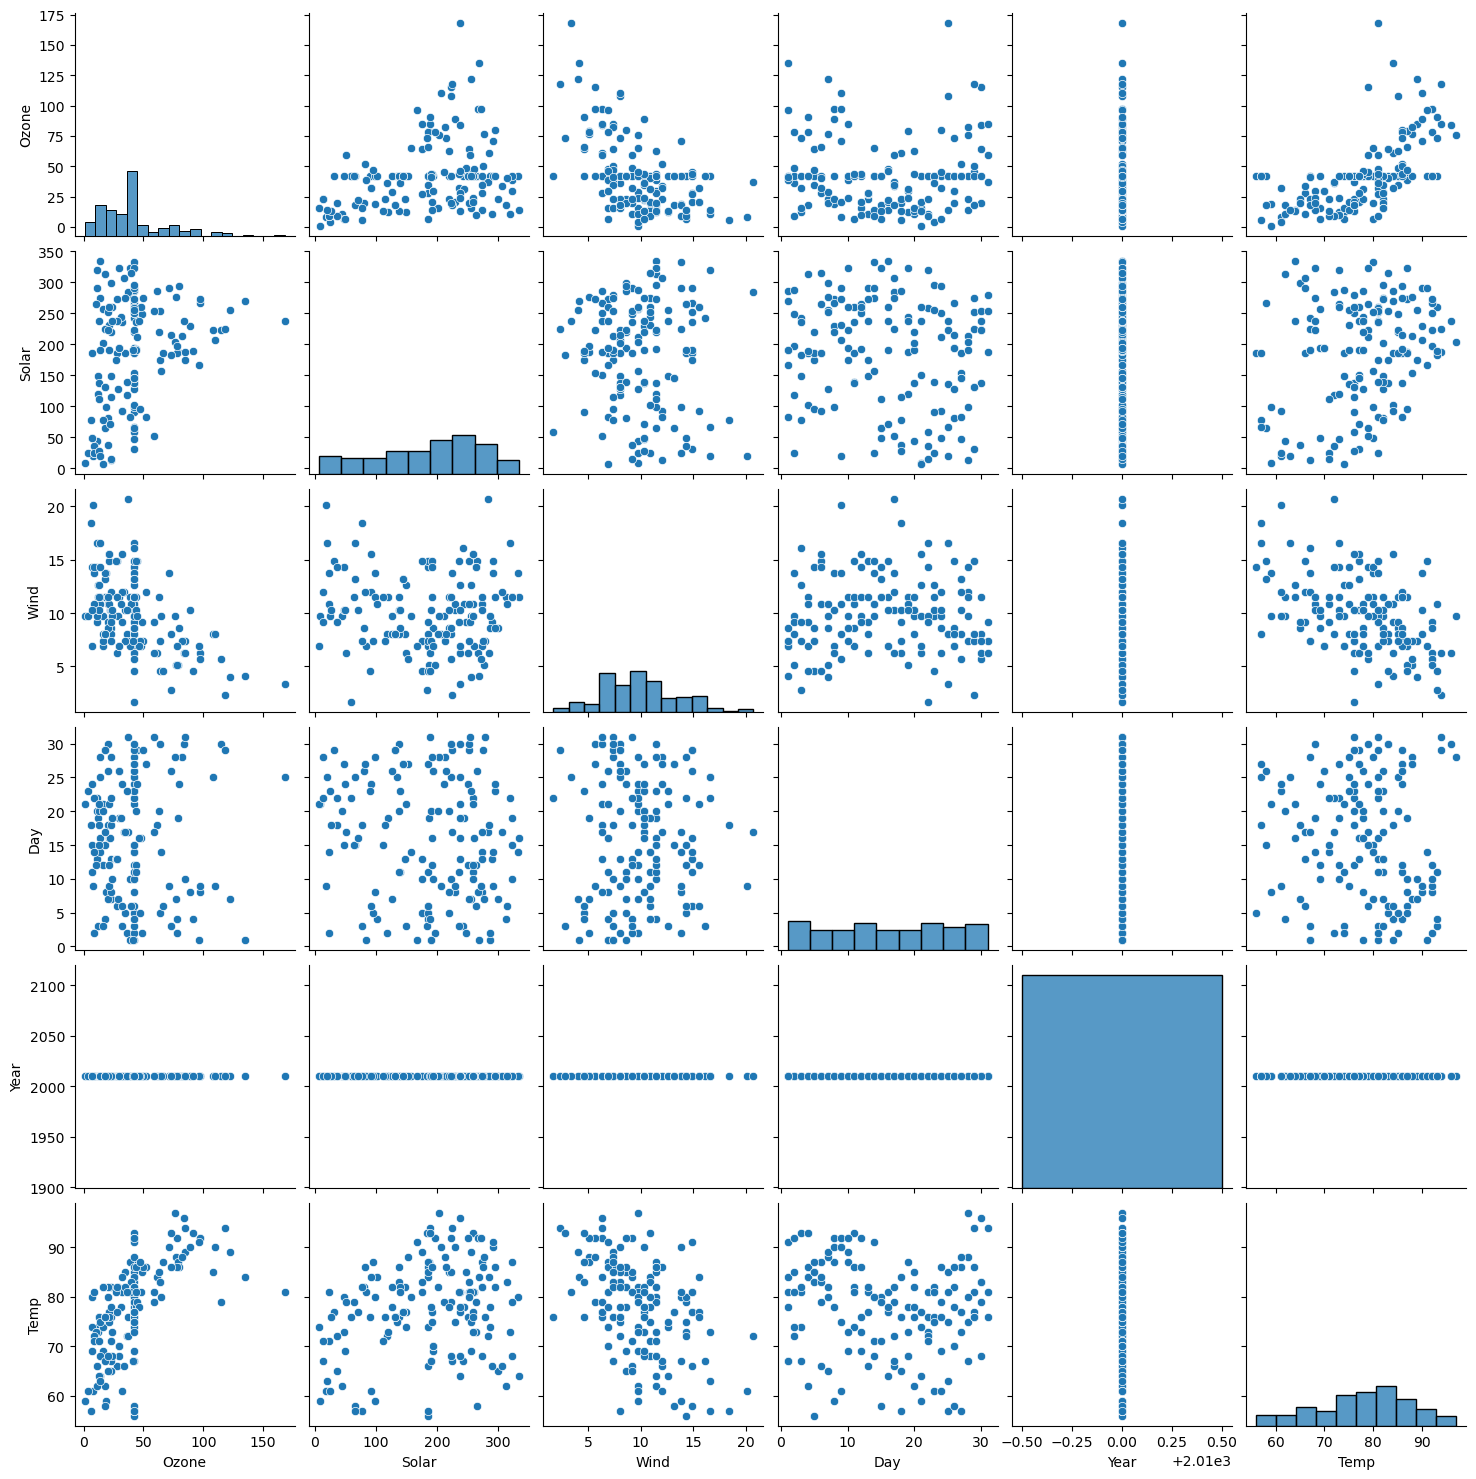

In [53]:
sns.pairplot(df_clean3)

# Transformations

Dummy variable

In [63]:
df_clean3.Weather.value_counts()

Weather
S     61
C     49
PS    47
Name: count, dtype: int64

In [74]:
#creating dummy variables for weather column
df_clean4=pd.get_dummies(df_clean3, columns=['Weather'], dtype=int)
df_clean4

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.000000,190.000000,7.4,5.0,1,2010,67,0,0,1
1,36.000000,118.000000,8.0,5.0,2,2010,72,1,0,0
2,12.000000,149.000000,12.6,5.0,3,2010,74,0,1,0
3,18.000000,313.000000,11.5,5.0,4,2010,62,0,0,1
4,41.815126,185.366667,14.3,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
152,20.000000,223.000000,11.5,9.0,30,2010,68,0,0,1
153,41.000000,190.000000,7.4,5.0,1,2010,67,1,0,0
154,30.000000,193.000000,6.9,9.0,26,2010,70,0,1,0
155,41.815126,145.000000,13.2,9.0,27,2010,77,0,0,1


In [77]:
df_clean4=df_clean4.dropna() #drop NaN rows where one of value NaN

# Normalization of data

In [78]:
import sklearn
sklearn.__version__

'1.6.1'

In [79]:
df_clean4.values

array([[41.0, 190.0, 7.4, ..., 0, 0, 1],
       [36.0, 118.0, 8.0, ..., 1, 0, 0],
       [12.0, 149.0, 12.6, ..., 0, 1, 0],
       ...,
       [30.0, 193.0, 6.9, ..., 0, 1, 0],
       [41.81512605042017, 145.0, 13.2, ..., 0, 0, 1],
       [18.0, 131.0, 8.0, ..., 1, 0, 0]], dtype=object)

In [100]:
#converting the data into standard normal with 0 mean & 1 standard deviation
from sklearn.preprocessing import StandardScaler
array = df_clean4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

#summarize transformed data
np.set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.03  0.05 -0.72 -1.43 -1.67  0.   -1.15 -0.67 -0.65  1.25]
 [-0.21 -0.78 -0.55 -1.43 -1.56  0.   -0.61  1.48 -0.65 -0.8 ]
 [-1.05 -0.42  0.76 -1.43 -1.45  0.   -0.4  -0.67  1.53 -0.8 ]
 [-0.84  1.47  0.45 -1.43 -1.33  0.   -1.68 -0.67 -0.65  1.25]
 [ 0.    0.    1.25 -1.43 -1.22  0.   -2.32 -0.67 -0.65  1.25]]


# Scaler

#### Scaler types -->

1.  __MinMaxScaler:__ </br >calculate `min_value` _(minimum value of data)_,
                        `max_value` _(maximum value of data)_ </br>
                        `(x - min_value)/(max_value - min_value)`

2. __StandardScaler:__ </br>calculate `mean`, `std_deviation` </br>
                        `(x - mean)/std_deviation`